In [135]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa import arima

In [2]:
df = pd.read_excel("Superstore.xls")

In [3]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [4]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [5]:
set(df['Category'])

{'Furniture', 'Office Supplies', 'Technology'}

In [6]:
furniture = df.loc[df['Category'] == 'Furniture']

In [7]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [8]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [9]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [10]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [11]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [12]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [13]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [14]:
y = furniture['Sales'].resample('MS').mean()

In [15]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [72]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 48 entries, 2014-01-01 to 2017-12-01
Freq: MS
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
48 non-null     float64
dtypes: float64(1)
memory usage: 1.8 KB


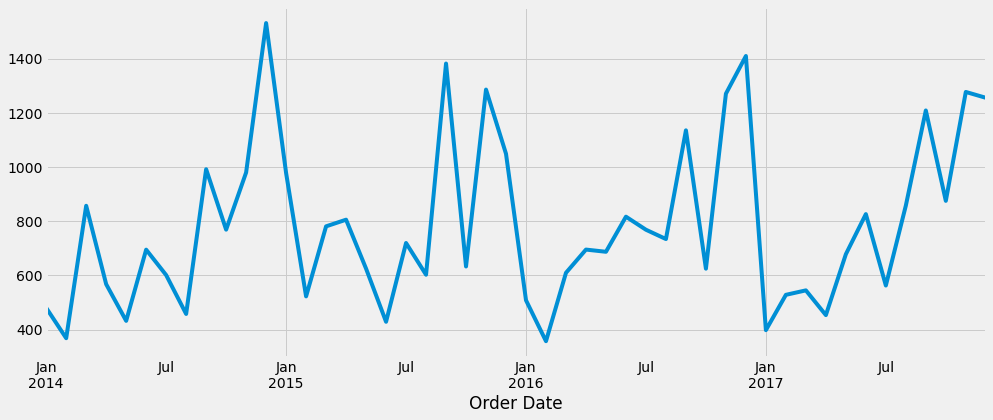

In [16]:
y.plot(figsize=(15, 6))
plt.show()

The above time series shows that there is a seasonality as frequency is changing for every year.it shows sideways trend .

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1440x1152 with 0 Axes>

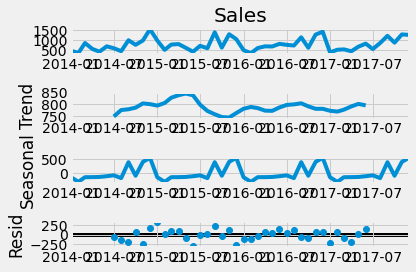

In [22]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
plt.figure(figsize=(20, 16))
decomposition.plot()
plt.show()

There's unusual behaviour in sales data as most of the fctors were not captured by trend or seasonality

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Holt-Winters additive method
model = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=seasonal_period)
fitted_model = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

# Generate forecasts
forecast_values = fitted_model.forecast(steps=forecast_horizon)

# Plot the observed data and forecasts
plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label='Observed Data')
plt.plot(forecast_values.index, forecast_values, label='Forecasted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [36]:
y.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
Freq: MS, Name: Sales, dtype: float64

In [39]:
y_column_names = y.name

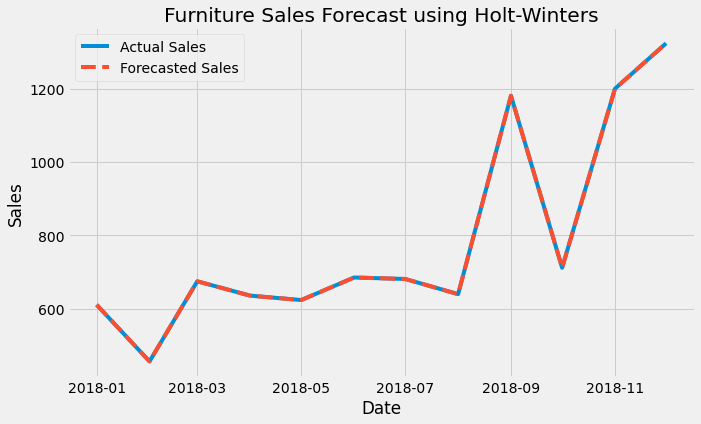

In [46]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt



# Fit the Holt-Winters model
model = ExponentialSmoothing(y, seasonal='add', seasonal_periods=12)  # You can adjust the seasonal period
fitted_model = model.fit()

# Forecast for the next year
forecast_periods = 12  # Forecast for 12 months (next year)
forecast = fitted_model.forecast(steps=forecast_periods)

# Create a dataframe for the forecast
forecast_index = pd.date_range(start=y.index[-1], periods=forecast_periods+1, freq='MS')[1:]  # Start from the next month
forecast_df = pd.DataFrame({'Sales': forecast}, index=forecast_index)

# Concatenate the original dataframe with the forecast dataframe
combined_df = pd.concat([y, forecast_df], axis=0)

# Plot the actual data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(combined_df.index, combined_df['Sales'], label='Actual Sales')
plt.plot(forecast_df.index, forecast_df['Sales'], label='Forecasted Sales', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture Sales Forecast using Holt-Winters')
plt.legend()
plt.grid(True026+
plt.show()


In [50]:
# Calculate RMSE and MAPE
actual_values = y[-forecast_periods:]
rmse = np.sqrt(((furniture['Sales'] - y) ** 2).mean())
mape = (np.abs((furniture['Sales'] -y) / actual_values)).mean() * 100

# Output RMSE and MAPE
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 1578.518570558166
Mean Absolute Percentage Error (MAPE): 141.4294838644906


In [ ]:
fitx = SimpleExpSmoothing(np.asarray(train['Close'])).fit(optimized=True)
print('optimal alpha chosen:', fitx.model.params['smoothing_level'])
rmse = sqrt(mean_squared_error(train['Close'], fitx.fittedvalues)) 
rmse

In [57]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [67]:
# Fit the Simple Exponential Smoothing model
fitx = SimpleExpSmoothing(y).fit(optimized=True)
print('Optimal alpha chosen:', fitx.model.params['smoothing_level'])

# Calculate RMSE for the fitted values
fitted_values = fitx.fittedvalues
rmse = sqrt(mean_squared_error(y, fitted_values))
print('RMSE:', rmse)

Optimal alpha chosen: 0.2629957284481797
RMSE: 313.4542503871472


In [68]:
minimum = rmse
for i in np.arange(0, 1.01, 0.01):
    fit2 = SimpleExpSmoothing(y).fit(smoothing_level= i, optimized=False)
    rmse = sqrt(mean_squared_error(y, fit2.fittedvalues))
    if rmse < minimum:
        min = rmse
        alpha = i
        y['Manual'] = fit2.forecast(len(furniture))
print('rmse for fitted values:', min, 'aplha from grid:', alpha)    

rmse for fitted values: <built-in function min> aplha from grid: 0.2


In [69]:
rms_train_opt = sqrt(mean_squared_error(y, fitx.fittedvalues)) 
print('rmse for fitted values with optimal alpha: ', rms_train_opt)
rms_train = sqrt(mean_squared_error(y, fit2.fittedvalues)) 
print('rmse for fitted values with supplied alpha: ', rms_train)

rmse for fitted values with optimal alpha:  313.4542503871472
rmse for fitted values with supplied alpha:  367.7615546841191


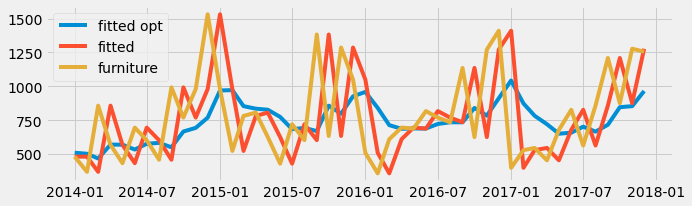

In [70]:
plt.figure(figsize=(10,3))
plt.plot(fitx.fittedvalues, label = 'fitted opt')
plt.plot(fit2.fittedvalues, label = 'fitted')
plt.plot(y, label='furniture')
plt.legend(loc='best')
plt.show()

In [77]:
train_size = int(len(df['Sales']) * 0.8)
train_data = df['Sales'][:train_size]
test_data = df['Sales'][train_size:]

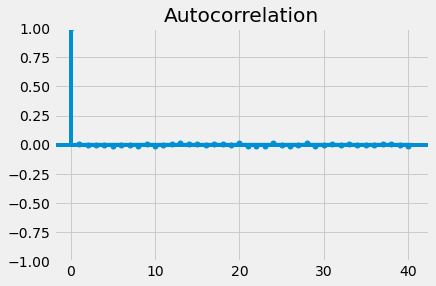

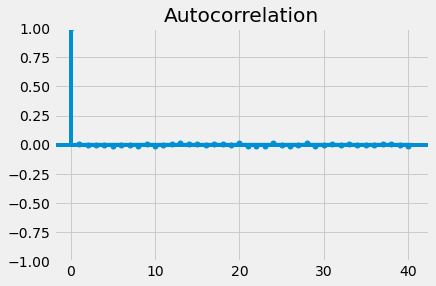

In [78]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.Sales)

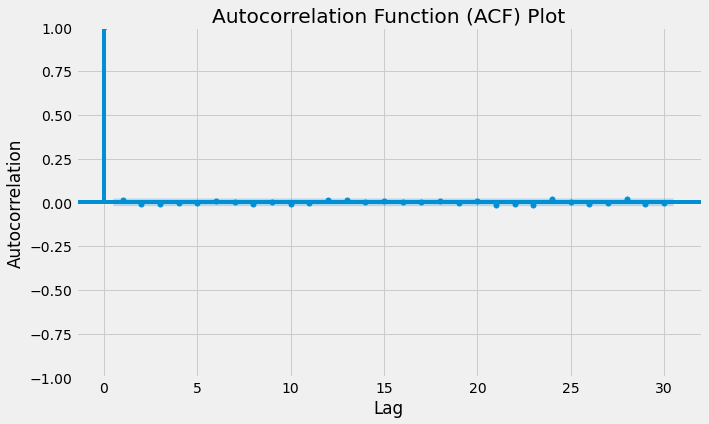

In [79]:
# Create an ACF plot
plt.figure(figsize=(10, 6))
plot_acf(train_data, lags=30, ax=plt.gca())  # 'lags' defines the number of lags to show
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

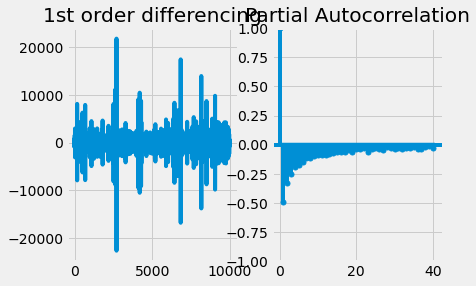

In [86]:
f= plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df.Sales.diff())

ax2=f.add_subplot(122)
plot_pacf(df.Sales.diff().dropna(),ax=ax2)
plt.show()

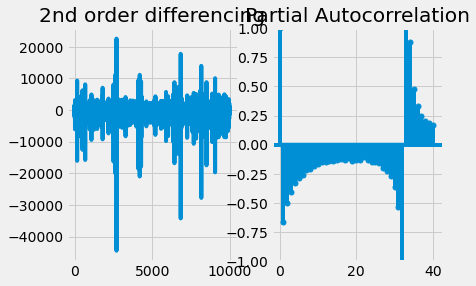

In [87]:
f= plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(df.Sales.diff().diff())

ax2=f.add_subplot(122)
plot_pacf(df.Sales.diff().diff().dropna(),ax=ax2)
plt.show()

In [103]:
# Fit the auto_arima model to find optimal parameters
model = pm.auto_arima(y, start_p=0, start_q=0,
                      max_p=5, max_q=5,
                      seasonal=False,
                      stepwise=True,
                      suppress_warnings=True,
                      error_action="ignore",
                      trace=True)

# Print the chosen order (p, d, q)
print("Chosen order (p, d, q):", model.order)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24040.854, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23775.434, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23616.338, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24038.855, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23576.268, Time=1.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23573.817, Time=2.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23654.736, Time=0.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23572.876, Time=2.80 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=23594.293, Time=0.57 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=23574.802, Time=2.75 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=23501.956, Time=8.70 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23502.990, Time=7.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=23501.543, Time=11.44 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=23577.848, Time=6.87 sec
 ARIMA(4,1,3)(0,0,

In [104]:
# Fit the auto_arima model to find optimal parameters
model = pm.auto_arima(train_data, start_p=0, start_q=0,
                      max_p=5, max_q=5,
                      seasonal=False,
                      stepwise=True,
                      suppress_warnings=True,
                      error_action="ignore",
                      trace=True)

# Print the chosen order (p, d, q)
print("Chosen order (p, d, q):", model.order)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=126552.419, Time=0.59 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=126409.116, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=126432.489, Time=0.75 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=126334.395, Time=0.50 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=126271.967, Time=0.74 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=126217.702, Time=0.89 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=126169.551, Time=1.07 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=15.95 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=14.91 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=125535.783, Time=2.59 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=125533.872, Time=1.82 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=125532.095, Time=1.43 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=125530.478, Time=1.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=125528.925, Time=0.41 sec
 ARIMA(0,0,0)(0,0

In [105]:
train_data

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
7990      1.9800
7991     39.9360
7992     18.4640
7993      4.8960
7994    145.7640
Name: Sales, Length: 7995, dtype: float64

In [108]:
index=train_data.index

In [110]:
# Fit the ARIMA model with the chosen order 
order = (0, 0, 0)
arima_model = sm.tsa.ARIMA(train_data, order=order)
arima_results = arima_model.fit()

# Make forecasts for the year 2018
forecast_steps = 12  # Number of steps to forecast (12 months)
forecast = arima_results.forecast(steps=forecast_steps)

# Create a date index for the forecasted values in 2018
forecast_index = pd.date_range(start='2018-01-01', periods=forecast_steps, freq='MS')  # Assuming monthly frequency


In [113]:
# To print the summary 
model.summary() 
# use the recommended fit
model = arima.model.ARIMA(train_data, order=(0,0,0), seasonal_order=(0,0,0,0))
model_fitted = model.fit()
model_fitted.params
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 7995
Model:                          ARIMA   Log Likelihood              -62762.494
Date:                Wed, 23 Aug 2023   AIC                         125528.988
Time:                        23:19:15   BIC                         125542.961
Sample:                             0   HQIC                        125533.771
                               - 7995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        229.7224     10.217     22.485      0.000     209.698     249.747
sigma2      3.838e+05    680.364    564.157      0.000    3.82e+05    3.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.98   Jarque-Bera (JB):          39354211.49
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            13.67
Prob(H) (two-sided):                  0.00   Kurtosis:                       345.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

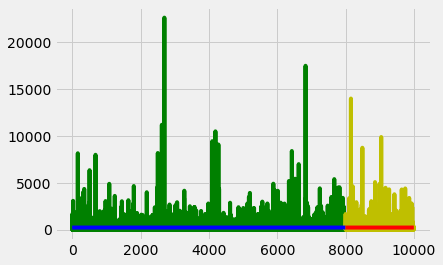

In [115]:
# plot train, test, in sample fitted values and out of sample forecast
plt.plot(train_data, color="g")
plt.plot(test_data, color="y")
plt.plot(model_fitted.fittedvalues, color="b")
plt.plot(model_fitted.forecast(steps=len(test_data)), color="r")
plt.show()

In [117]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [118]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:31724.78135189248
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:29275.21869672551
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:27352.549504654933
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:27178.402959394156
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:27200.57233499022
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:27089.02441286193
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:27180.43325012051
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:26917.81373359004
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:28922.553808416575
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:27317.593386561675
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:26192.62735229353
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:26061.744791893885
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:25969.600170542086
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:25953.03198361009
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:26080.164436651103
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:25594.45715694401
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:24031.256269975318
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:23892.008374457557
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:25

In [119]:
# Print the chosen order (p, d, q)
print("Chosen order (p, d, q):", model.order)

Chosen order (p, d, q): (1, 1, 1)


In [120]:
# Training the ARIMA model.
model = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2131      0.025      8.369      0.000       0.163       0.263
ma.L1         -0.6812      0.019    -35.328      0.000      -0.719      -0.643
ar.S.L12      -0.4431      0.013    -34.896      0.000      -0.468      -0.418
sigma2       370.9534      6.847     54.179      0.000     357.534     384.373


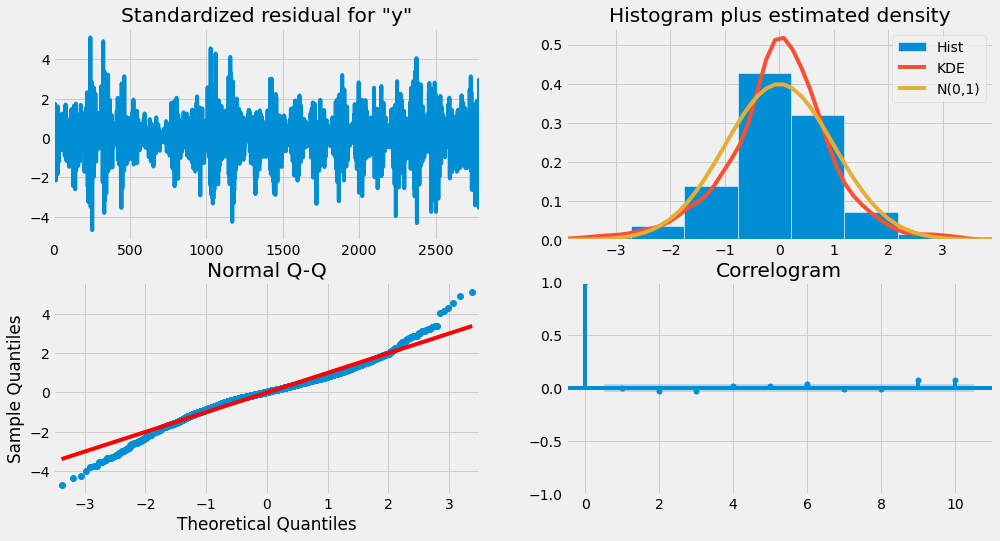

In [121]:
results.plot_diagnostics(figsize=(15, 8))
plt.show()